## Section 2

***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### Baseball as a Motivating Example

Load the Lahman library. Filter the Teams data frame to include years from 1961 to 2001. Make a scatterplot of runs per game versus at bats (AB) per game.

In [2]:
df = pd.read_csv("teams.csv")

In [3]:
df

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance
0,1876,BSN,NL,NaN,4,70,39,31,0.56,471,450,2722,723,96,24,9,894.00,58,nan,nan,98.00,0.27,0.28,0.33,nan,nan,2.51,49,3,7,632.00,176,732,7,104,77,102,98,South End Grounds I,nan
1,1876,CHC,NL,NaN,1,66,52,14,0.79,624,257,2748,926,131,32,8,1145.00,70,nan,nan,45.00,0.34,0.35,0.42,nan,nan,1.76,59,9,4,592.00,116,608,6,29,51,112,106,23rd Street Grounds,nan
2,1876,CIN,NL,NaN,8,65,9,56,0.14,238,579,2372,555,51,12,4,642.00,41,nan,nan,136.00,0.23,0.25,0.27,nan,nan,3.62,57,0,0,591.00,238,850,9,34,60,86,95,Avenue Grounds,nan
3,1876,HAR,NL,NaN,3,69,47,21,0.69,429,261,2664,711,96,22,2,857.00,39,nan,nan,78.00,0.27,0.28,0.32,nan,nan,1.67,69,11,0,624.00,116,570,2,27,114,108,103,Hartford Ball Club Grounds,nan
4,1876,LOU,NL,NaN,5,69,30,36,0.46,280,344,2570,641,68,14,6,755.00,24,nan,nan,98.00,0.25,0.26,0.29,nan,nan,1.69,67,5,0,643.00,121,605,3,38,125,118,118,Louisville Baseball Park,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2001,SFG,NL,W,2,162,90,72,0.56,799,748,5612,1493,304,40,235,nan,625,50.00,54.00,1090.00,0.27,0.34,0.46,57.00,42.00,4.18,3,8,47,1463.30,680,1437,145,579,1080,91,92,NaN,3311958.00
2381,2001,STL,NL,C,2,162,93,69,0.57,814,684,5450,1469,274,32,199,nan,529,65.00,50.00,1089.00,0.27,0.34,0.44,91.00,35.00,3.93,8,11,38,1435.30,627,1389,196,526,1083,99,99,NaN,3109578.00
2382,2001,TBD,AL,E,5,162,62,100,0.38,672,887,5524,1426,311,21,121,nan,456,54.00,25.00,1116.00,0.26,0.32,0.39,115.00,52.00,4.94,1,6,30,1423.70,781,1513,207,569,1030,100,100,NaN,1298365.00
2383,2001,TEX,AL,W,4,162,73,89,0.45,890,968,5685,1566,326,23,246,nan,548,75.00,55.00,1093.00,0.28,0.34,0.47,97.00,32.00,5.71,4,3,37,1438.30,913,1670,222,596,951,100,100,NaN,2831021.00


In [4]:
df2 = df[(df["Year"] > 1960) & (df["Year"] < 2002)]

In [5]:
df2

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance
1188,1961,BAL,AL,NaN,3,163,95,67,0.59,691,588,5481,1393,227,36,149,2139.00,581,nan,nan,902.00,0.25,0.33,0.39,39.00,30.00,3.22,54,21,33,1471.00,526,1226,109,617,926,98,97,Memorial Stadium,951089.00
1189,1961,BOS,AL,NaN,6,163,76,86,0.47,729,792,5508,1401,251,37,112,2062.00,647,nan,nan,847.00,0.25,0.33,0.37,56.00,36.00,4.29,35,6,30,1442.00,687,1472,167,679,831,102,104,Fenway Park II,850589.00
1190,1961,CHC,NL,NaN,7,156,64,90,0.42,689,800,5344,1364,238,51,176,2232.00,539,nan,nan,1027.00,0.26,0.32,0.42,35.00,25.00,4.48,34,6,25,1385.00,689,1492,165,465,755,101,104,Wrigley Field,673057.00
1191,1961,CHW,AL,NaN,4,163,86,76,0.53,765,726,5556,1475,216,46,138,2197.00,550,nan,nan,612.00,0.27,0.33,0.40,100.00,40.00,4.06,39,3,33,1448.00,653,1491,158,498,814,98,97,Comiskey Park,1146019.00
1192,1961,CIN,NL,NaN,1,154,93,61,0.60,710,653,5243,1414,247,35,158,2205.00,423,nan,nan,761.00,0.27,0.32,0.42,70.00,33.00,3.78,46,12,40,1370.00,575,1300,147,500,829,101,101,Crosley Field,1117603.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2001,SFG,NL,W,2,162,90,72,0.56,799,748,5612,1493,304,40,235,nan,625,50.00,54.00,1090.00,0.27,0.34,0.46,57.00,42.00,4.18,3,8,47,1463.30,680,1437,145,579,1080,91,92,NaN,3311958.00
2381,2001,STL,NL,C,2,162,93,69,0.57,814,684,5450,1469,274,32,199,nan,529,65.00,50.00,1089.00,0.27,0.34,0.44,91.00,35.00,3.93,8,11,38,1435.30,627,1389,196,526,1083,99,99,NaN,3109578.00
2382,2001,TBD,AL,E,5,162,62,100,0.38,672,887,5524,1426,311,21,121,nan,456,54.00,25.00,1116.00,0.26,0.32,0.39,115.00,52.00,4.94,1,6,30,1423.70,781,1513,207,569,1030,100,100,NaN,1298365.00
2383,2001,TEX,AL,W,4,162,73,89,0.45,890,968,5685,1566,326,23,246,nan,548,75.00,55.00,1093.00,0.28,0.34,0.47,97.00,32.00,5.71,4,3,37,1438.30,913,1670,222,596,951,100,100,NaN,2831021.00


In [6]:
df2["RPG"] = df2["R"] / df2["G"]

In [7]:
df2["BPG"] = df2["AB"] / df2["G"]

In [8]:
df2.head()

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance,RPG,BPG
1188,1961,BAL,AL,NaN,3,163,95,67,0.59,691,588,5481,1393,227,36,149,2139.00,581,nan,nan,902.00,0.25,0.33,0.39,39.00,30.00,3.22,54,21,33,1471.00,526,1226,109,617,926,98,97,Memorial Stadium,951089.00,4.24,33.63
1189,1961,BOS,AL,NaN,6,163,76,86,0.47,729,792,5508,1401,251,37,112,2062.00,647,nan,nan,847.00,0.25,0.33,0.37,56.00,36.00,4.29,35,6,30,1442.00,687,1472,167,679,831,102,104,Fenway Park II,850589.00,4.47,33.79
1190,1961,CHC,NL,NaN,7,156,64,90,0.42,689,800,5344,1364,238,51,176,2232.00,539,nan,nan,1027.00,0.26,0.32,0.42,35.00,25.00,4.48,34,6,25,1385.00,689,1492,165,465,755,101,104,Wrigley Field,673057.00,4.42,34.26
1191,1961,CHW,AL,NaN,4,163,86,76,0.53,765,726,5556,1475,216,46,138,2197.00,550,nan,nan,612.00,0.27,0.33,0.40,100.00,40.00,4.06,39,3,33,1448.00,653,1491,158,498,814,98,97,Comiskey Park,1146019.00,4.69,34.09
1192,1961,CIN,NL,NaN,1,154,93,61,0.60,710,653,5243,1414,247,35,158,2205.00,423,nan,nan,761.00,0.27,0.32,0.42,70.00,33.00,3.78,46,12,40,1370.00,575,1300,147,500,829,101,101,Crosley Field,1117603.00,4.61,34.05


In [9]:
df2["WPG"] = df2["W"] / df2["G"]

In [10]:
df2["EPG"] = df2["ERA"] / df2["G"]

In [11]:
df2.head()

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance,RPG,BPG,WPG,EPG
1188,1961,BAL,AL,NaN,3,163,95,67,0.59,691,588,5481,1393,227,36,149,2139.00,581,nan,nan,902.00,0.25,0.33,0.39,39.00,30.00,3.22,54,21,33,1471.00,526,1226,109,617,926,98,97,Memorial Stadium,951089.00,4.24,33.63,0.58,0.02
1189,1961,BOS,AL,NaN,6,163,76,86,0.47,729,792,5508,1401,251,37,112,2062.00,647,nan,nan,847.00,0.25,0.33,0.37,56.00,36.00,4.29,35,6,30,1442.00,687,1472,167,679,831,102,104,Fenway Park II,850589.00,4.47,33.79,0.47,0.03
1190,1961,CHC,NL,NaN,7,156,64,90,0.42,689,800,5344,1364,238,51,176,2232.00,539,nan,nan,1027.00,0.26,0.32,0.42,35.00,25.00,4.48,34,6,25,1385.00,689,1492,165,465,755,101,104,Wrigley Field,673057.00,4.42,34.26,0.41,0.03
1191,1961,CHW,AL,NaN,4,163,86,76,0.53,765,726,5556,1475,216,46,138,2197.00,550,nan,nan,612.00,0.27,0.33,0.40,100.00,40.00,4.06,39,3,33,1448.00,653,1491,158,498,814,98,97,Comiskey Park,1146019.00,4.69,34.09,0.53,0.02
1192,1961,CIN,NL,NaN,1,154,93,61,0.60,710,653,5243,1414,247,35,158,2205.00,423,nan,nan,761.00,0.27,0.32,0.42,70.00,33.00,3.78,46,12,40,1370.00,575,1300,147,500,829,101,101,Crosley Field,1117603.00,4.61,34.05,0.60,0.02


In [12]:
#df2.to_csv("modifiedteams.csv", index=False)

In [13]:
df2["HRG"] = df2["HR"] / df2["G"]

In [14]:
X = df2["BPG"]
y = df2["HRG"]

In [15]:
X = sm.add_constant(X)

In [16]:
model = sm.OLS(y,X).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HRG   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     227.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.74e-46
Time:                        15:17:38   Log-Likelihood:                 99.286
No. Observations:                1026   AIC:                            -194.6
Df Residuals:                    1024   BIC:                            -184.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7210      0.436    -13.107      0.000      -6.577      -4.864
BPG            0.1931      0.013     15.067      0.000       0.168       0.218
==============================================================================
Omnibus:                       14.729   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.612
Skew:                           0.236   Prob(JB):                      0.00111
Kurtosis:                       2.690   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Least Squares Estimates, part 2

In [18]:
df3 = pd.read_csv("galtonfamily.csv")

In [19]:
df3.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.50,67.00,75.43,4,1,male,73.20
1,1,78.50,67.00,75.43,4,2,female,69.20
2,1,78.50,67.00,75.43,4,3,female,69.00
3,1,78.50,67.00,75.43,4,4,female,69.00
4,2,75.50,66.50,73.66,4,1,male,73.50


In [20]:
female_heights = df3[df3["gender"] == "female"]

In [21]:
female_heights

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.50,67.00,75.43,4,2,female,69.20
2,1,78.50,67.00,75.43,4,3,female,69.00
3,1,78.50,67.00,75.43,4,4,female,69.00
6,2,75.50,66.50,73.66,4,3,female,65.50
7,2,75.50,66.50,73.66,4,4,female,65.50
...,...,...,...,...,...,...,...,...
927,202,63.00,63.50,65.79,2,1,female,68.50
928,202,63.00,63.50,65.79,2,2,female,63.50
930,203,62.00,66.00,66.64,3,2,female,62.00
931,203,62.00,66.00,66.64,3,3,female,61.00


In [22]:
female_heights = female_heights[["mother","childHeight"]]

In [23]:
y = female_heights['mother']
X = female_heights['childHeight']

In [24]:
X = sm.add_constant(X)

In [25]:
model = sm.OLS(y,X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mother   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     46.31
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.22e-11
Time:                        15:17:38   Log-Likelihood:                -989.26
No. Observations:                 453   AIC:                             1983.
Df Residuals:                     451   BIC:                             1991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.3906      2.758     16.456      0.000      39.970      50.811
childHeight     0.2926      0.043      6.805      0.000       0.208       0.377
==============================================================================
Omnibus:                        8.995   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.031
Skew:                          -0.308   Prob(JB):                       0.0109
Kurtosis:                       3.316   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df3.head(1)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.50,67.00,75.43,4,1,male,73.20


In [28]:
model.predict([1,73.20])

array([66.81048253])

### Tibbles, do, and broom, part 2

In [29]:
df4 = pd.read_csv("galton.csv")

The galton dataset is a sample of one male and one female child from each family in the GaltonFamilies dataset. The pair column denotes whether the pair is father and daughter, father and son, mother and daughter, or mother and son.

In [30]:
df4.head()

,family,midparentHeight,children,childNum,gender,childHeight,pair,parentHeight
0,1,75.43,4,2,female,69.20,father_daughter,78.50
1,1,75.43,4,1,male,73.20,father_son,78.50
2,2,73.66,4,4,female,65.50,father_daughter,75.50
3,2,73.66,4,2,male,72.50,father_son,75.50
4,3,72.06,2,2,female,68.00,father_daughter,75.00


In [31]:
df4.groupby("pair").agg(["count","mean","median","std"])

midparentHeight                   children                  childNum                  childHeight                   parentHeight                  
                          count  mean median  std    count mean median  std    count mean median  std       count  mean median  std        count  mean median  std
pair                                                                                                                                                              
father_daughter             176 69.34  69.27 1.90      176 5.02      5 2.63      176 4.28      4 2.31         176 64.11  64.00 2.35          176 69.42  69.60 2.73
father_son                  179 69.11  69.10 1.90      179 4.95      5 2.63      179 1.80      2 0.98         179 69.24  69.50 2.63          179 69.10  69.00 2.55
mother_daughter             176 69.34  69.27 1.90      176 5.02      5 2.63      176 4.28      4 2.31         176 64.11  64.00 2.35          176 64.12  64.00 2.29
mother_son                  179 69.11  69.10 1.90      179 4.95      5 2.63      179 1.80      2 0.98         179 69.24  69.50 2.63          179 63.99  64.00 2.37

In [32]:
df4.groupby("pair").corr()

midparentHeight  children  childNum  childHeight  parentHeight
pair                                                                                           
father_daughter midparentHeight             1.00     -0.12     -0.10         0.54          0.76
                children                   -0.12      1.00      0.91        -0.10         -0.15
                childNum                   -0.10      0.91      1.00        -0.21         -0.12
                childHeight                 0.54     -0.10     -0.21         1.00          0.40
                parentHeight                0.76     -0.15     -0.12         0.40          1.00
father_son      midparentHeight             1.00      0.06      0.03         0.52          0.74
                children                    0.06      1.00      0.53         0.01          0.01
                childNum                    0.03      0.53      1.00        -0.25          0.05
                childHeight                 0.52      0.01     -0.25         1.00          0.43
                parentHeight                0.74      0.01      0.05         0.43          1.00
mother_daughter midparentHeight             1.00     -0.12     -0.10         0.54          0.69
                children                   -0.12      1.00      0.91        -0.10         -0.01
                childNum                   -0.10      0.91      1.00        -0.21         -0.03
                childHeight                 0.54     -0.10     -0.21         1.00          0.38
                parentHeight                0.69     -0.01     -0.03         0.38          1.00
mother_son      midparentHeight             1.00      0.06      0.03         0.52          0.75
                children                    0.06      1.00      0.53         0.01          0.08
                childNum                    0.03      0.53      1.00        -0.25         -0.00
                childHeight                 0.52      0.01     -0.25         1.00          0.34
                parentHeight                0.75      0.08     -0.00         0.34          1.00

Use lm() and the broom package to fit regression lines for each parent-child pair type. Compute the least squares estimates, standard errors, confidence intervals and p-values for the parentHeight coefficient for each pair.

In [33]:
df4.groupby("pair").agg(["mean"])

,midparentHeight,children,childNum,childHeight,parentHeight
,mean,mean,mean,mean,mean
pair,,,,,
father_daughter,69.34,5.02,4.28,64.11,69.42
father_son,69.11,4.95,1.80,69.24,69.10
mother_daughter,69.34,5.02,4.28,64.11,64.12
mother_son,69.11,4.95,1.80,69.24,63.99


In [34]:
df5 = df4.groupby("pair").mean()

In [35]:
df5.reset_index(inplace=True, drop=False)

In [36]:
df5

,pair,midparentHeight,children,childNum,childHeight,parentHeight
0,father_daughter,69.34,5.02,4.28,64.11,69.42
1,father_son,69.11,4.95,1.80,69.24,69.10
2,mother_daughter,69.34,5.02,4.28,64.11,64.12
3,mother_son,69.11,4.95,1.80,69.24,63.99


In [37]:
df5.columns

Index(['pair', 'midparentHeight', 'children', 'childNum', 'childHeight', 'parentHeight'], dtype='object')

In [38]:
df6 = pd.get_dummies(df5)

In [39]:
df6

,midparentHeight,children,childNum,childHeight,parentHeight,pair_father_daughter,pair_father_son,pair_mother_daughter,pair_mother_son
0,69.34,5.02,4.28,64.11,69.42,1,0,0,0
1,69.11,4.95,1.80,69.24,69.10,0,1,0,0
2,69.34,5.02,4.28,64.11,64.12,0,0,1,0
3,69.11,4.95,1.80,69.24,63.99,0,0,0,1


In [40]:
df6.columns

Index(['midparentHeight', 'children', 'childNum', 'childHeight', 'parentHeight', 'pair_father_daughter', 'pair_father_son', 'pair_mother_daughter', 'pair_mother_son'], dtype='object')

In [41]:
y = df6['midparentHeight']
X = df6[['children', 'childNum', 'childHeight', 'parentHeight', 'pair_father_daughter','pair_father_son', 'pair_mother_daughter', 'pair_mother_son']]

In [42]:
X = sm.add_constant(X)

In [43]:
model = sm.OLS(y,X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        midparentHeight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                nan
Time:                        15:17:38   Log-Likelihood:                 117.64
No. Observations:                   4   AIC:                            -227.3
Df Residuals:                       0   BIC:                            -229.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0542        inf          0        nan         nan         nan
children                 0.3104        inf          0        nan         nan         nan
childNum                 1.5247        inf          0        nan         nan         nan
childHeight              0.8111        inf          0        nan         nan         nan
parentHeight             0.1333        inf          0        nan         nan         nan
pair_father_daughter    -0.0657        inf         -0        nan         nan         nan
pair_father_son         -0.6003        inf         -0        nan         nan         nan
pair_mother_daughter     0.6400        inf          0        nan         nan         nan
pair_mother_son          0.0803        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.152
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.476
Skew:                          -0.493   Prob(JB):                        0.788
Kurtosis:                       1.628   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [45]:
model.pvalues

const                  nan
children               nan
childNum               nan
childHeight            nan
parentHeight           nan
pair_father_daughter   nan
pair_father_son        nan
pair_mother_daughter   nan
pair_mother_son        nan
dtype: float64

### Regression and baseball, part 2

In [46]:
lahman = pd.read_csv("Teams2020.csv")

In [47]:
lahman.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,nan,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.00,19.00,73.00,16.00,nan,nan,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.83,Boston Red Stockings,South End Grounds I,nan,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,nan,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.00,22.00,69.00,21.00,nan,nan,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.83,Chicago White Stockings,Union Base-Ball Grounds,nan,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,nan,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.00,25.00,18.00,8.00,nan,nan,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.82,Cleveland Forest Citys,National Association Grounds,nan,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,nan,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.00,9.00,16.00,4.00,nan,nan,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.80,Fort Wayne Kekiongas,Hamilton Field,nan,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,nan,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.00,15.00,46.00,15.00,nan,nan,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.84,New York Mutuals,Union Grounds (Brooklyn),nan,90,88,NYU,NY2,NY2


Use the Teams data frame from the Lahman package. Fit a multivariate linear regression model to obtain the effects of BB and HR on Runs (R) in 1971. Use the tidy() function in the broom package to obtain the results in a data frame.

In [48]:
lahman1971 = lahman[lahman["yearID"]==1971]

In [49]:
lahman1971.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1565,1971,NL,ATL,ATL,W,3,162,82.00,82,80,N,NaN,N,N,643,5575,1434,192,30,153,434.00,747.00,57.00,46.00,28.00,44.00,699,614,3.75,40,11,31,4424,1529,152,485,823,146,180,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,1006320.00,106,107,ATL,ATL,ATL
1566,1971,AL,BAL,BAL,E,1,158,77.00,101,57,Y,NaN,Y,N,742,5303,1382,207,25,158,672.00,844.00,66.00,38.00,46.00,37.00,530,470,2.99,71,15,22,4246,1257,125,416,793,112,148,0.98,Baltimore Orioles,Memorial Stadium,1023037.00,99,97,BAL,BAL,BAL
1567,1971,AL,BOS,BOS,E,3,162,80.00,85,77,N,NaN,N,N,691,5401,1360,246,28,161,552.00,871.00,51.00,34.00,32.00,47.00,667,610,3.80,44,11,35,4329,1424,136,535,871,116,149,0.98,Boston Red Sox,Fenway Park II,1678732.00,108,108,BOS,BOS,BOS
1568,1971,AL,CAL,ANA,W,4,162,81.00,76,86,N,NaN,N,N,511,5495,1271,213,18,96,441.00,827.00,72.00,34.00,29.00,31.00,576,510,3.10,39,11,32,4443,1246,101,607,904,131,159,0.98,California Angels,Anaheim Stadium,926373.00,93,93,CAL,CAL,CAL
1569,1971,AL,CHA,CHW,W,3,162,81.00,79,83,N,NaN,N,N,617,5382,1346,185,30,138,562.00,870.00,83.00,65.00,51.00,38.00,597,503,3.12,46,19,32,4351,1348,100,468,976,160,128,0.97,Chicago White Sox,Comiskey Park,833891.00,104,104,CHW,CHA,CHA


In [50]:
y = lahman1971['R']
X = lahman1971[['BB','HR']]

In [51]:
X = sm.add_constant(X)

In [52]:
model = sm.OLS(y,X).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     8.109
Date:                Sat, 03 Apr 2021   Prob (F-statistic):            0.00246
Time:                        15:17:39   Log-Likelihood:                -131.41
No. Observations:                  24   AIC:                             268.8
Df Residuals:                      21   BIC:                             272.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.2894    111.550      2.306      0.031      25.308     489.270
BB             0.4140      0.210      1.967      0.063      -0.024       0.852
HR             1.2953      0.431      3.006      0.007       0.399       2.191
==============================================================================
Omnibus:                        3.810   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.470
Skew:                           0.776   Prob(JB):                        0.291
Kurtosis:                       3.247   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Repeat the above exercise to find the effects of BB and HR on runs (R) for every year from 1961 to 2018 using do() and the broom package. 

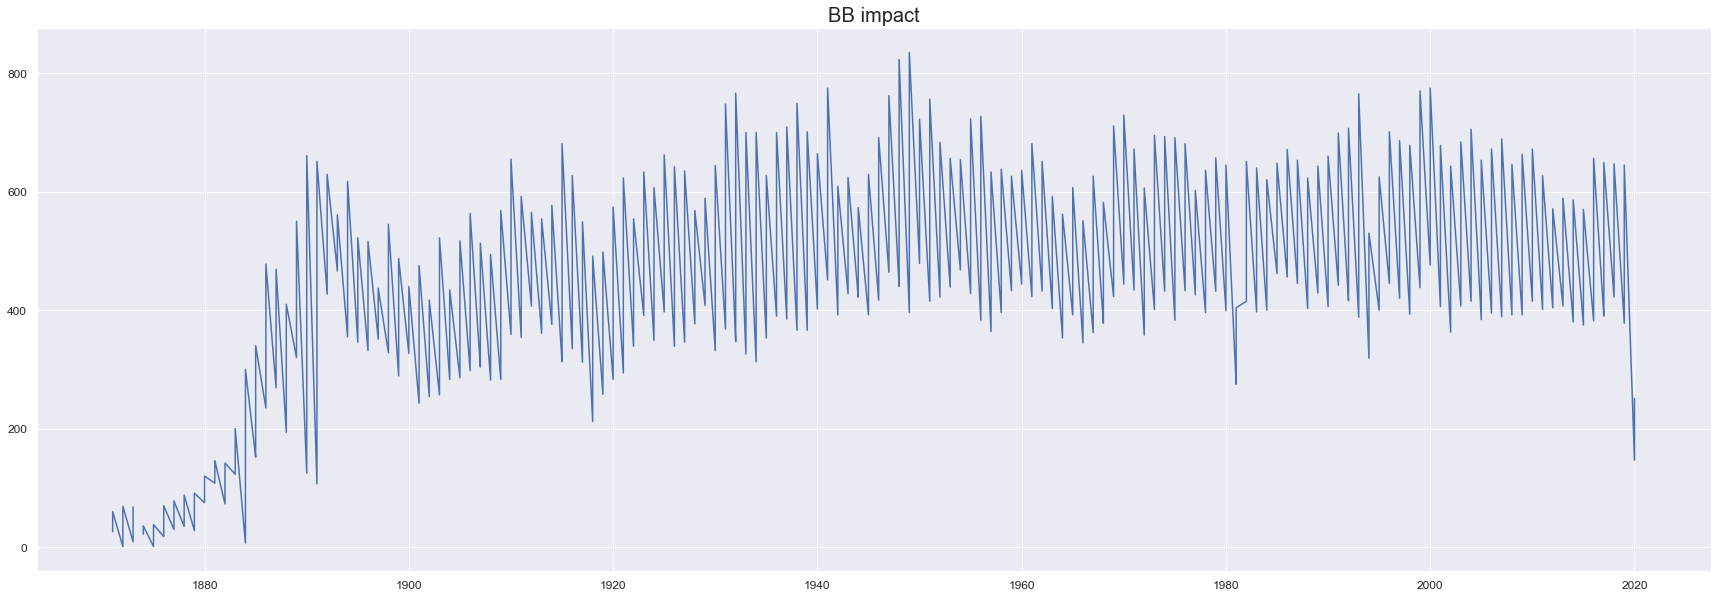

In [54]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=lahman.yearID,y=lahman.BB,data=lahman, estimator=None)
plt.title("BB impact", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

In [55]:
lahmangroup = lahman.groupby("yearID")["BB"].mean()
lahmangroup 

yearID
1871    43.67
1872    23.91
1873    41.88
1874    29.75
1875    19.15
        ...  
2016   502.93
2017   527.63
2018   522.87
2019   529.83
2020   203.07
Name: BB, Length: 150, dtype: float64

In [56]:
lahmangroup = pd.DataFrame(lahmangroup)

In [57]:
lahmangroup

,BB
yearID,
1871,43.67
1872,23.91
1873,41.88
1874,29.75
1875,19.15
...,...
2016,502.93
2017,527.63
2018,522.87


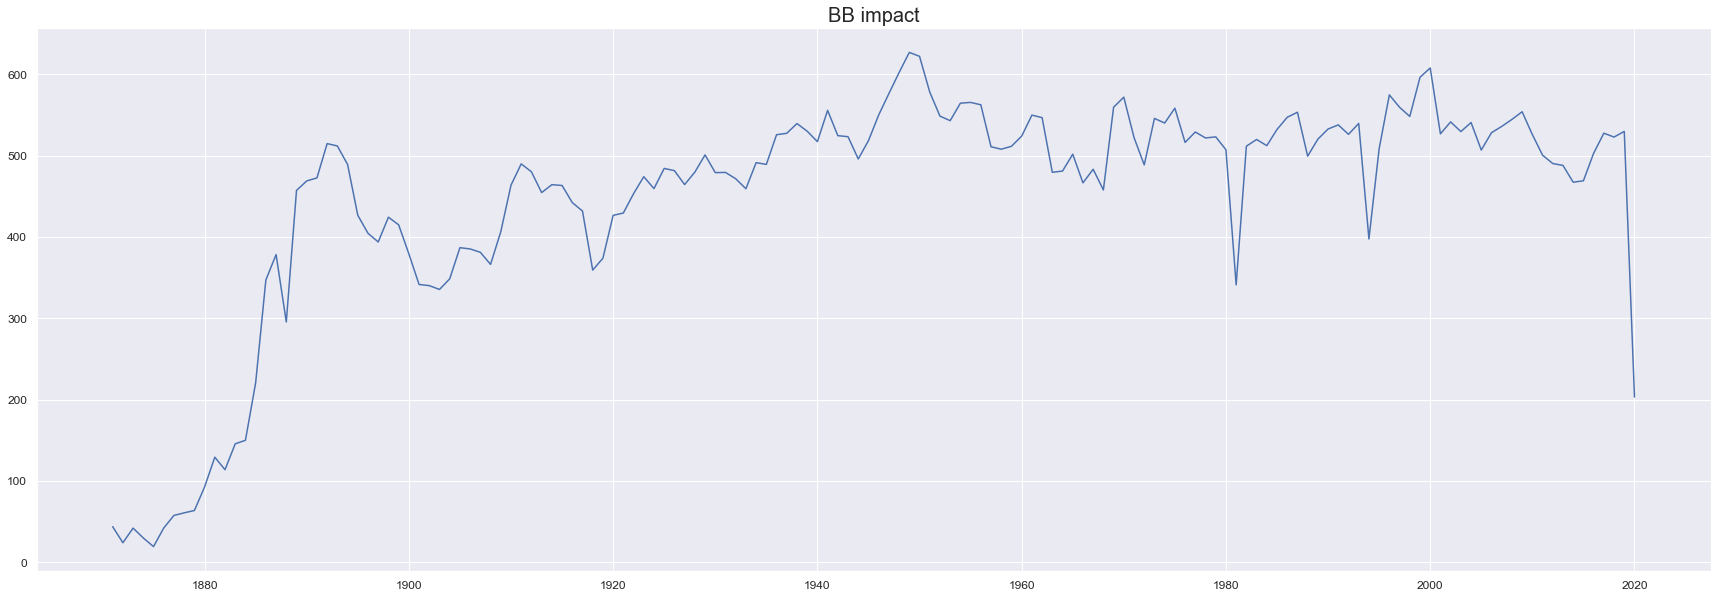

In [58]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=lahmangroup.index,y=lahmangroup.BB,data=lahmangroup, estimator=None)
plt.title("BB impact", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

#### Python code done by Dennis Lam